<a href="https://colab.research.google.com/github/yamil-abraham/predicting-human-weight/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import requests
import io

# save the URL from dataset
# https://rpubs.com/kevin_rodriguez/caso1_rl_Rlang
url = "https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.FIFA.limpios.csv"
s = requests.get(url).text
# The data frame stores data about soccer players, so it will be stored in a variable 'soccer_data'.
soccer_data = pd.read_csv(io.StringIO(s))

soccer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17955 entries, 0 to 17954
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17955 non-null  int64  
 1   Name                      17955 non-null  object 
 2   Age                       17955 non-null  int64  
 3   Nationality               17955 non-null  object 
 4   Overall                   17955 non-null  int64  
 5   Potential                 17955 non-null  int64  
 6   Club                      17955 non-null  object 
 7   Preferred.Foot            17907 non-null  object 
 8   International.Reputation  17907 non-null  float64
 9   Weak.Foot                 17907 non-null  float64
 10  Skill.Moves               17907 non-null  float64
 11  Height                    17907 non-null  object 
 12  Weight                    17907 non-null  object 
 13  Crossing                  17907 non-null  float64
 14  Finish

In [20]:
soccer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17955 entries, 0 to 17954
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17955 non-null  int64  
 1   Name                      17955 non-null  object 
 2   Age                       17955 non-null  int64  
 3   Nationality               17955 non-null  object 
 4   Overall                   17955 non-null  int64  
 5   Potential                 17955 non-null  int64  
 6   Club                      17955 non-null  object 
 7   Preferred.Foot            17907 non-null  object 
 8   International.Reputation  17907 non-null  float64
 9   Weak.Foot                 17907 non-null  float64
 10  Skill.Moves               17907 non-null  float64
 11  Height                    17907 non-null  object 
 12  Weight                    17907 non-null  object 
 13  Crossing                  17907 non-null  float64
 14  Finish

In [21]:
# apply 'Estatura' and 'PesoKgs' columns
data = soccer_data[['Estatura','PesoKgs']]
x_notnull = data['Estatura'].notna()
y_notnull = data['PesoKgs'].notna()
filtered_data = data[x_notnull & y_notnull]
filtered_data.head(10)

,Estatura,PesoKgs
0,1.70,72.12
1,1.88,83.01
2,1.75,68.04
3,1.93,76.20
4,1.80,69.85
5,1.73,73.94
6,1.73,66.22
7,1.83,86.18
8,1.83,82.10
9,1.88,87.09


<Axes: xlabel='Estatura', ylabel='PesoKgs'>

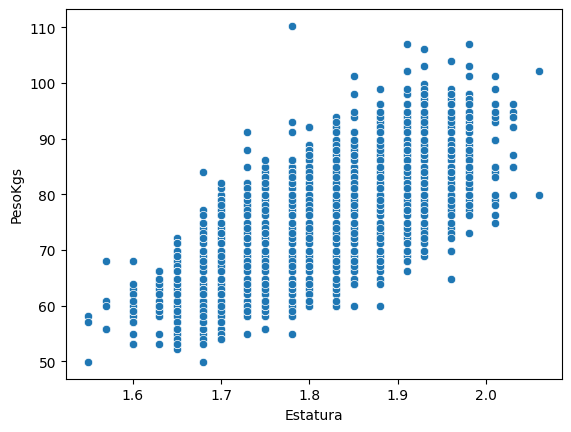

In [22]:
import seaborn as sb
sb.scatterplot(x='Estatura', y='PesoKgs', data = filtered_data)

In [23]:
# Features (X), Labels (Y)

X = filtered_data['Estatura']
y = filtered_data['PesoKgs']

In [24]:
X,y

(0        1.70
 1        1.88
 2        1.75
 3        1.93
 4        1.80
          ... 
 17950    1.75
 17951    1.91
 17952    1.73
 17953    1.78
 17954    1.78
 Name: Estatura, Length: 17907, dtype: float64,
 0        72.12
 1        83.01
 2        68.04
 3        76.20
 4        69.85
          ...  
 17950    60.78
 17951    77.11
 17952    67.13
 17953    69.85
 17954    79.83
 Name: PesoKgs, Length: 17907, dtype: float64)

In [25]:
X_processed = X.values.reshape(-1,1)
y_processed = y.values.reshape(-1,1)

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [27]:
model.fit(X_processed, y_processed)

LinearRegression()

In [28]:
height = 1.73
prediction = model.predict([[height]])
print(f"A height of {height}m corresponds to a weight of {prediction[0,0]}kg")

A height of 1.73m corresponds to a weight of 68.78597133800137kg


In [29]:
model.score(X_processed, y_processed)

0.5688046888853393

In [30]:
X_units = []
y_units = []
for i in range(len(X_processed)):
    if X_processed[i] not in X_units:
        X_units.append(X_processed[i,0])
        y_units.append(y_processed[i,0])

units = {'Height': X_units, 'Weight': y_units}

In [31]:
data_units = pd.DataFrame(units)
data_units

,Height,Weight
0,1.70,72.12
1,1.88,83.01
2,1.75,68.04
3,1.93,76.20
4,1.80,69.85
5,1.73,73.94
6,1.83,86.18
7,1.68,72.12
8,1.78,74.84
9,1.98,96.16


<Axes: xlabel='Height', ylabel='Weight'>

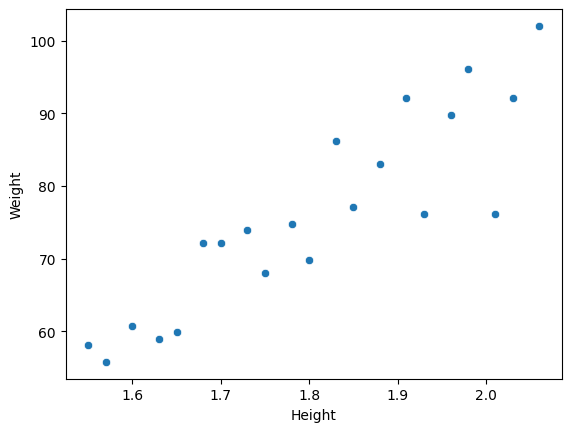

In [32]:
sb.scatterplot(x='Height', y='Weight', data=data_units)

In [33]:
X_units = data_units['Height']
X_units_processed = X_units.values.reshape(-1,1)
y_units = data_units['Weight']
y_units_processed = y_units.values.reshape(-1,1)

In [34]:
model = LinearRegression()
model.fit(X_units_processed, y_units_processed)
model.score(X_units_processed, y_units_processed)

0.8022045421331013

In [35]:
# Predict using a known value
height = 1.93
prediction = model.predict([[height]])
print(f"A height of {height}m corresponds to a weight of {prediction[0,0]}kg")

A height of 1.93m corresponds to a weight of 85.54999714340121kg


In [36]:
# Predict using a known value
height = 1.66
prediction = model.predict([[height]])
print(f"A height of {height}m corresponds to a weight of {prediction[0,0]}kg")

A height of 1.66m corresponds to a weight of 65.0422296705389kg
